# Machine Learning (laboratory instruction)
## Multiclass classification

### Submission

<u>Submission:</u>

Compress all files into **single zip** archive and submit via Wikamp. See below the content of the archive (replace the `name` and `surname` with proper values):
```
📂 name.surname.zip
+-- 📜 06-Classification metrics.ipynb
```

<u>Grades</u>

| Percentage of all points | mark |
| :----                    | ---: |
| [0-50)   | 2   |
| [50-60)  | 3   |
| [60-70)  | 3.5 |
| [70-80)  | 4   |
| [80-90)  | 4.5 |
| [90-100] | 5   |

<u>Penalties</u>

* `mark - 0.5` if tasks are submitted after laboratory (but less than 7 days); 
* `mark - 1` if tasks are submitted after one week (>=7 days but < 14 days);
* `mark - 1.5` if tasks are submitted later than two weeks (>=14 days).

<u>Warning:</u>

It is NOT allowed to share your .ipynb file with other students nor Internet. All students should download the exercise files directly from WIKAMP. Group work is considered as plagiarism.

<u>Plagiarism Disclaimer:</u>

I hereby declare that this exercise is my own and autonomous work. I am aware of the consequences and I am familiar with the university regulations.

### The goal.

Learn how to use and read classification metrics.


### Task 1. Accuracy, recall and precision.

We can enumerate following statistical measures of the classification:
* True positive (TP)  - the sample is properly classified as positive
* False positive (FP) - the sample is wrongly classified as positive
* True negative (TN)  - the sample is properly classified as negative
* False negative (FN) - the sample is wrongly classified as negative

In all previous laboratories accuracy score has been used to measure the classifier performance:

$$
\texttt{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Read the classification results from `06-enemy.npz` file. This is the result of classifier that detects the enemy. There are two variables:
* `prediction` - the output of the classifier,
* `target` - the expected result.

The value 1 denotes there was an enemy near our radar, the value 0 denote it wasn't an enemy.

**Task**: Calculate the accuracy.


**Question**: Do you think the performence of the classifier is good?


**Task**: Calculate the sensitivity (recall, true positive rate):

$$
\texttt{Sensitivity} = \frac{TP}{TP + FN}
$$

**Question**: What do you think now about the classifier?

**Task**:
Calculate the precision:

$$
\texttt{Precision} = \frac{TP}{TP + FP}
$$

**Task**:
Calculate the specificity (true negative rate):

$$
\texttt{Specificity} = \frac{TN}{TN + FP}
$$


**Question**: Write your conclusions.








In [1]:
# >>> WRITE YOUR CODE BELOW <<<
import numpy as np

with open('06-enemy.npz', 'rb') as f:
    data = np.load(f)
    predictions, target = data['predictions'], data['target']

In [2]:
def metrics(pred, target):
    total = len(target)
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(total):
        pred_sample = pred[i]
        target_sample = target[i]
        if target_sample == 1:
            if pred_sample == 1:
                TP += 1
            else:
                FP += 1
        else:
            if pred_sample == 1:
                FN += 1
            else:
                TN += 1

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    sensitivity = TP / (TP + FN)
    precision = TP / (TP + FP)
    specificity = TN / (TN + FP)

    return accuracy, sensitivity, precision, specificity

In [3]:
accuracy, sensitivity, precision, specificity = metrics(predictions, target)

print(f"{accuracy = }")
print(f"{sensitivity = }")
print(f"{precision = }")
print(f"{specificity = }")

accuracy = 0.981
sensitivity = 0.980980980980981
precision = 1.0
specificity = 1.0


### Task 2. Receiver operating characteristic.

1. Read the data from `device.npz`. This is the dataset used in one of previous laboratory.

2. Use your logistic regression implementation to train the model on this data (you can copy and paste your previous code).

3. Calculate the metrics: accuracy, precision, specificity, sensitivity.

4. You used the threshold 0.5 to classify the sample to 0 or 1 (if the value is $\ge 0.5$ you classify it as positive (1) and if the value is $< 0.5$ then you classify it as negative sample (0)).

    1. Calculate the `sensitivity` (true positive rate - TPR) and `1 - specificity` (false positive rate - FPR) for various threshold values in range between 0 and 1 (you can generate such values using `np.linspace(0, 1, 1000)`. In other words you need to calculate the prediction for all of above values and calculate the metrics.
    2. Display the line chart with TPR on the y-axis and FPR on the x-axis.
    
    
*Note: Perfectly, we would like to have a model that maximizes the TPR and minimizes the FPR.*

*Note: In practice there you may need to use different metrics such as precision/recall curve.*




### Task 3: Confusion matrix.

The confusion matrix helps to visualize the classifier performance in table. Each row of the matrix represents the predicted class, while each column represents the ground truth (the actual class). In this task you can use implementation that is available in [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) library.

1. Read the data `06-animals.npz` (the data contains target and predictions).

2. Calculate the confusion matrix.

3. Display the confusion matrix using `matplotlib` (labels should be visible and it should be clear which are predictions and which are actual classes).


In [4]:
# >>> WRITE YOUR CODE BELOW <<<
import numpy as np

with open('06-animals.npz', 'rb') as f:
    data = np.load(f)
    predictions, target, classes = data['predictions'], data['target'], data['classes']

# Adding the first class
classes = np.insert(classes, 0, '', axis=0)

<ipython-input-5-60bed285819d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(classes)
<ipython-input-5-60bed285819d>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(classes)


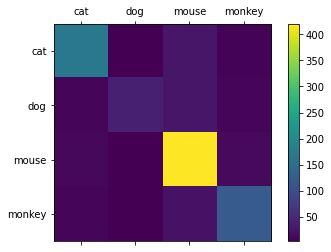

[[170   4  28   7]
 [ 10  39  29   8]
 [ 12   4 420  13]
 [  8   3  23 122]]


In [5]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

confusion_matrix = confusion_matrix(predictions, target)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion_matrix, interpolation='nearest')
fig.colorbar(cax)
ax.set_xticklabels(classes)
ax.set_xlabel = "predictions"
ax.set_yticklabels(classes)
ax.set_ylabel = "target"
# ax.set(ax.set_xticklabels(classes), ax.set_yticklabels(classes), 
#        ax.set_xlabel == "predictions", ax.set_ylabel == "target")
plt.show()
print(confusion_matrix)